<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
diff = np.float32(12.123452) - np.float32(12.123450)

valor_real = 0.000002

error = abs(diff - valor_real)/valor_real*100

#(12.123452/valor_real)*1/(2**31)
error

1.9073486e-06


4.632568359374996

ZeroDivisionError: division by zero

In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def expo(x,N):
  exp = 0
  for i in range(N):
    exp += (-1)**i * x**i/factorial(i)

  return exp


x = 0.1
N = 100
ew = expo(x,N)
eexaactoo = np.exp(-x)

ew, eexaactoo

(0.9048374180359596, 0.9048374180359595)

In [ ]:
def Truncador(x,N):
  sx = expo(x,N)
  tresh = 1e-7*sx
  exp_ = 0
  for i in range(N):
    exp_ = abs(x**(i+1)/factorial(i+1))
    if exp_ <= tresh:
      break

  exp = expo(x,i)

  return exp, i


x = 100
N = 10000
exacto = np.exp(-x)
print(f'valor de la serie: {expo(x,N)}')
print(f'valor de la serie truncada: {Truncador(x,N)}')
print(f'valor exacto: {exacto}')

valor de la serie: -2.8756582514726483e+26
valor de la serie truncada: (-2.8756582514726483e+26, 9999)
valor exacto: 3.720075976020836e-44


In [ ]:
def inv(x,N):
  exp = 0
  for i in range(N):
    exp += x**i/factorial(i)
  return 1/exp

x = 10
N = 100
exacto = np.exp(-x)
print(f'valor de la serie: {expo(x,N)}')
print(f'valor de la serie inversa: {inv(x,N)}')
print(f'valor exacto: {exacto}')

valor de la serie: 4.5399929433607724e-05
valor de la serie inversa: 4.539992976248486e-05
valor exacto: 4.5399929762484854e-05


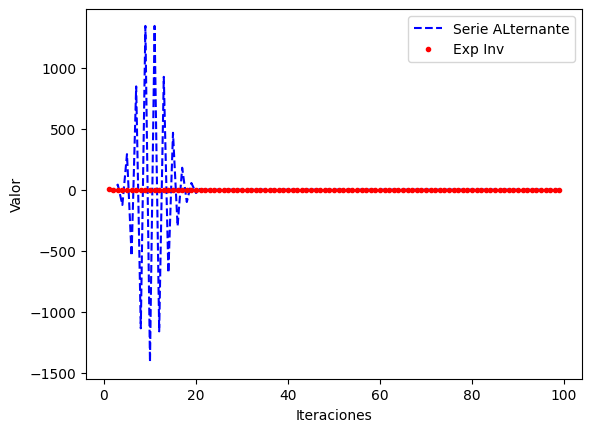

In [ ]:
x= 10
n = 100
N = np.arange(1,n,1)
exp1_ = np.zeros(len(N))
exp_2 = np.zeros(len(N))

for i,n in enumerate(N):
  exp1_[i] = expo(x,n)
  exp_2[i] = inv(x,n)

plt.plot(N,exp1_, 'b--', label= "Serie ALternante")
plt.plot(N,exp_2,'r.',label = "Exp Inv")
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.show()

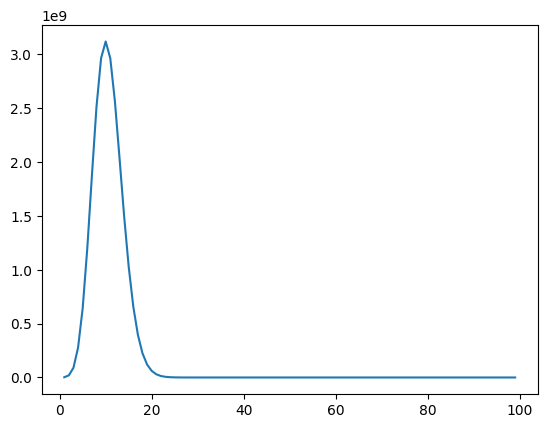

In [ ]:
x = 10
N = np.arange(1,100,1)

exc = np.exp(-x)
error = abs(exp1_ - exc)/exc*100

plt.plot(N,error)




```
# Tiene formato de código
```




## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




Definicion de funciones SN1,SN2,SN3

In [1]:
def ExpSN(N):
  SN = 0
  for i in range(1,2*N+1):
    SN += (-1)**i * (i/(i+1))


  return SN

In [2]:
ExpSN(100)

0.30437144514006564

In [3]:
 def SN2(N):
  SN = 0
  SN_1 = 0
  for i in range(1,N+1):
    SN += (((2*i)-1)/(2*i))
    SN_1 += 2*i/(2*i + 1)

  sn_T = -(SN) + SN_1

  return sn_T

In [4]:
SN2(100)

0.30437144514002057

In [5]:
def SN3(N):
  SN = 0
  for i in range(1,N+1):
    SN += 1/((2*i)*(2*i + 1))

  return SN

In [6]:
SN3(100)

0.3043714451400664

In [7]:
import numpy as np
np.arange(0,100,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

Desarrollo Grafica Log-Log

In [14]:
N = int(1000)
i = 1
L = []
M = []
log_N = []
while i != N:
 #for i in range(1,N+1):

  E_1 = abs((ExpSN(i)-SN3(i))/SN3(i))
  L.append(E_1)
  E_2 = abs((SN2(i)-SN3(i))/SN3(i))
  M.append(E_2)
  log_N.append(np.log10(i))
  i = i+1

<ipython-input-15-d8ed0377c4e0>:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(N,np.log10(E_1), 'b--', label= "Erro relativo sn1")


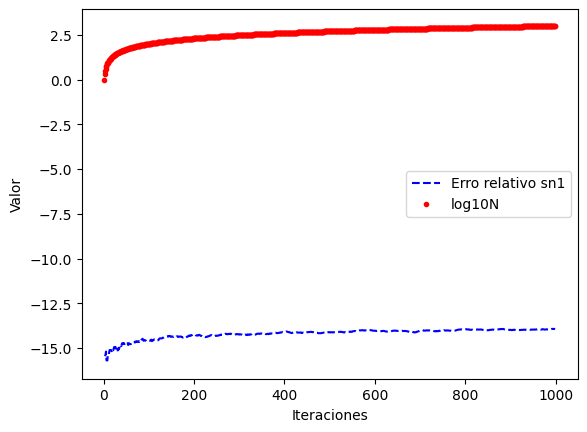

In [15]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000


N = np.arange(1,n,1)
sn_1 = np.zeros(len(N))
sn_2 = np.zeros(len(N))
sn_3 = np.zeros(len(N))

for i,n in enumerate(N):
  sn_1[i] = ExpSN(n)
  sn_2[i] = SN2(n)
  sn_3[i] = SN3(n)

E_1 = abs((sn_1-sn_3)/sn_3)
E_2 = abs((sn_2 - sn_3)/sn_3)
logN = np.log10(N)

plt.plot(N,np.log10(E_1), 'b--', label= "Erro relativo sn1")
plt.plot(N,logN,'r.',label = "log10N")
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.show()

<ipython-input-16-d0c0fc64e18c>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(N,np.log10(E_2), 'b--', label= "Erro relativo sn2")


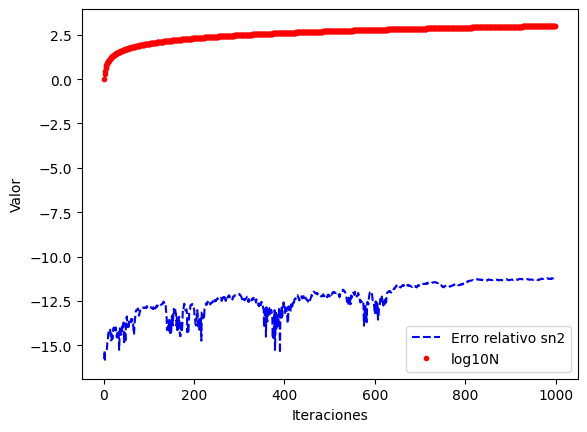

In [16]:
plt.plot(N,np.log10(E_2), 'b--', label= "Erro relativo sn2")
plt.plot(N,logN,'r.',label = "log10N")
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.show()

De lo que se puede analizar de las graficas es que el error relativo en SN_1, tiende a converger a un valor, mientras que con SN_2, su error tiende a aumentar a medida de las iteraciones y diverger entre varios valores

In [ ]:
E_1